# Задачи к Лекции 1

Дан файл "athlete_events", который содержит информацию об олимпийских чемпионах за последние 120 лет.

**Чтение данных**

При загрузке оставляем только информацию о призерах с данными без пропусков.

In [107]:
pip install matplotlib

In [1]:
%matplotlib inline
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('athlete_events.csv')
#z = zipfile.ZipFile("../data/athlete_events.zip")
#df = pd.read_csv(z.open("athlete_events.csv"))
df = df.dropna(subset=['Medal', "Age", "Height", "Weight"])
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold


**Получение различной информации**

In [2]:
df.shape

(30181, 15)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30181 entries, 40 to 271103
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30181 non-null  int64  
 1   Name    30181 non-null  object 
 2   Sex     30181 non-null  object 
 3   Age     30181 non-null  float64
 4   Height  30181 non-null  float64
 5   Weight  30181 non-null  float64
 6   Team    30181 non-null  object 
 7   NOC     30181 non-null  object 
 8   Games   30181 non-null  object 
 9   Year    30181 non-null  int64  
 10  Season  30181 non-null  object 
 11  City    30181 non-null  object 
 12  Sport   30181 non-null  object 
 13  Event   30181 non-null  object 
 14  Medal   30181 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 3.7+ MB


In [4]:
df.describe()

,ID,Age,Height,Weight,Year
count,30181.000000,30181.000000,30181.000000,30181.000000,30181.000000
mean,70225.949604,25.429012,177.642358,73.753554,1988.005964
std,38839.720551,5.049684,10.924188,15.004992,22.718451
min,16.000000,13.000000,136.000000,28.000000,1896.000000
25%,37494.000000,22.000000,170.000000,63.000000,1976.000000
50%,69771.000000,25.000000,178.000000,73.000000,1992.000000
75%,104111.000000,28.000000,185.000000,83.000000,2006.000000
max,135563.000000,66.000000,223.000000,182.000000,2016.000000


**1. Сколько мужчин и женщин получили золотые, серебрянные и бронзовые медали?**

In [5]:
df.groupby(['Sex'])['Medal'].value_counts()

Sex  Medal 
F    Bronze    3475
     Silver    3438
     Gold      3437
M    Gold      6730
     Bronze    6673
     Silver    6428
Name: count, dtype: int64

**2. Какая страна получила наибольшее количество золотых медалей за всю историю олимпийских игр?**

In [6]:
 #только золотые медали     группировка страны-золотые медали   сортировка                 вывести первое
df.query("Medal == 'Gold'").groupby(['Team'])['Medal'].count().sort_values(ascending=False).index[0]

'United States'

**3. Выведите распределение пола участника олимпиады от вида спорта (crosstab)**

In [7]:
pd.crosstab(df['Sex'], df['Sport'], margins=True)

Sport,Alpine Skiing,Archery,Art Competitions,Athletics,Badminton,Baseball,Basketball,Beach Volleyball,Biathlon,Bobsleigh,...,Taekwondo,Tennis,Trampolining,Triathlon,Tug-Of-War,Volleyball,Water Polo,Weightlifting,Wrestling,All
Sex,,,,,,,,,,,,,,,,,,,,,
F,180,100,0,1239,73,0,390,35,147,24,...,72,84,14,15,0,469,191,105,68,10350
M,174,106,2,2409,81,333,610,33,241,259,...,72,89,15,15,8,489,573,427,899,19831
All,354,206,2,3648,154,333,1000,68,388,283,...,144,173,29,30,8,958,764,532,967,30181


**4. Выведите средний возраст и его стандартное отклонения для женщин, учавствовавших в хоккее на льду**

In [8]:
print(df[(df['Sex'] == 'F') & (df['Sport'] == 'Ice Hockey')]['Age'].mean())
print(df[(df['Sex'] == 'F') & (df['Sport'] == 'Ice Hockey')]['Age'].std())

24.42
4.360463907080283


**5. У какой страны больше всего было женщин, получивших бронзовую медаль?**

In [9]:
df[(df['Sex'] == 'F') & (df['Medal'] == 'Bronze')].groupby('Team').size().sort_values(ascending=False).index[0]

'United States'

**6. Постройте гистограмму распределения количества медалей (бронза, серебро, золото) для первых трех стран, получивших наибольшее количество медалей**

In [10]:
medal_count = df.groupby(['Team', 'Medal']).size().reset_index(name='Count') #reset_index заменяет индекс датафрейма на обычный индекс, состоящий из целых чисел 1.
top_3_countries = medal_count.groupby('Team').sum()['Count'].sort_values(ascending=False)[:3] #топ стран по количеству медалей
filtered_df = medal_count[medal_count['Team'].isin(top_3_countries.index)] #топ стран по количеству медалей c распределением по номиналу
filtered_df

,Team,Medal,Count
171,Germany,Bronze,540
172,Germany,Gold,508
173,Germany,Silver,470
403,Soviet Union,Bronze,613
404,Soviet Union,Gold,961
405,Soviet Union,Silver,629
476,United States,Bronze,938
477,United States,Gold,2075
478,United States,Silver,1260


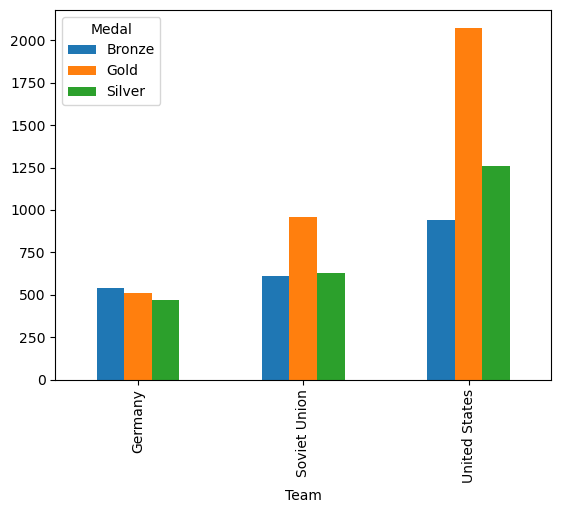

In [11]:
filtered_df.pivot(index='Team', columns='Medal', values='Count').plot(kind='bar')
plt.show()

**7. Нарисуйте распределение веса мужчин, получивших серебрянную медаль(density или distplot)**

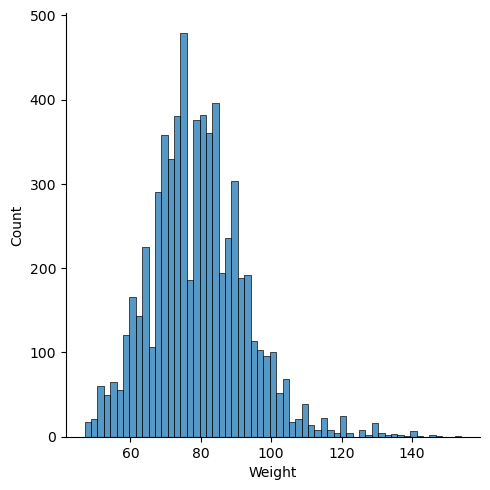

In [12]:
silver_men_df = df[(df["Sex"] == "M") & (df["Medal"] == "Silver")]
sns.displot(data = silver_men_df['Weight'])
plt.show()

**8. Постройте boxplot для возраста участника в зависимости от медали**

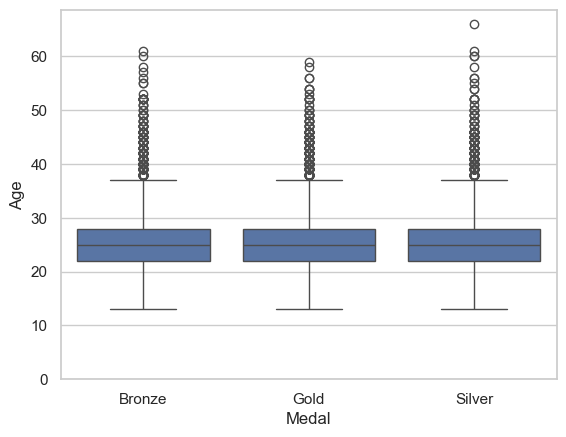

In [13]:
sns.set(style="whitegrid")
ax = sns.boxplot(x='Medal', y='Age', data=df)
plt.ylim(0, None)
plt.show()

**9. Постройте pairplot для веса, возраста и роста участников от USA.**

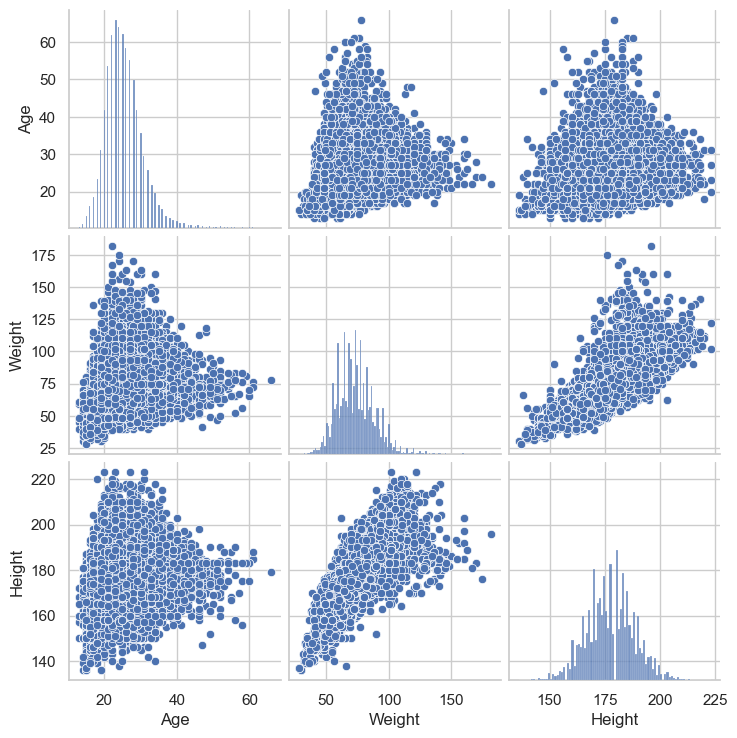

In [14]:
dfUSA = df[df.Team == 'United States']
sns.pairplot(df[['Age', 'Weight', 'Height']])
plt.show()